In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , classification_report, precision_score, recall_score, f1_score , roc_auc_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

In [2]:
df = pd.read_csv("onlinefraud.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
pd.options.display.float_format = "{:.0f}".format

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620
mean,243,179862,833883,855114,1100702,1224996,0,0
std,142,603858,2888243,2924049,3399180,3674129,0,0
min,1,0,0,0,0,0,0,0
25%,156,13390,0,0,0,0,0,0
50%,239,74872,14208,0,132706,214661,0,0
75%,335,208721,107315,144258,943037,1111909,0,0
max,743,92445517,59585040,49585040,356015889,356179279,1,1


In [7]:
df.shape

(6362620, 11)

In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
dup = df[df.duplicated()]

In [10]:
dup

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [11]:
#there are no duplicate rows in the data

In [12]:
df.shape

(6362620, 11)

In [13]:
df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

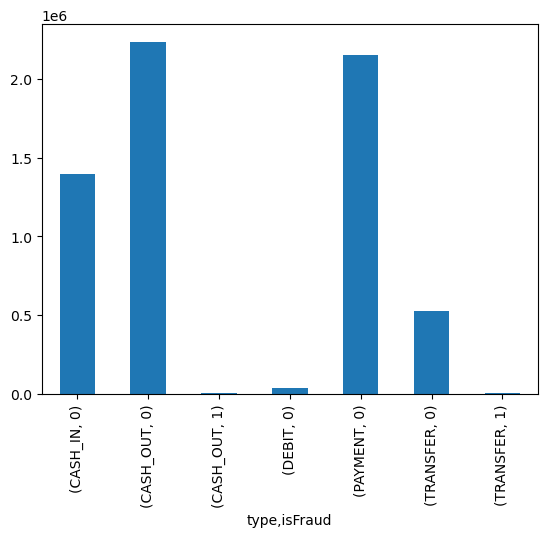

In [14]:
fraud_type=df.groupby(["type","isFraud"]).size().plot(kind="bar")
plt.show()

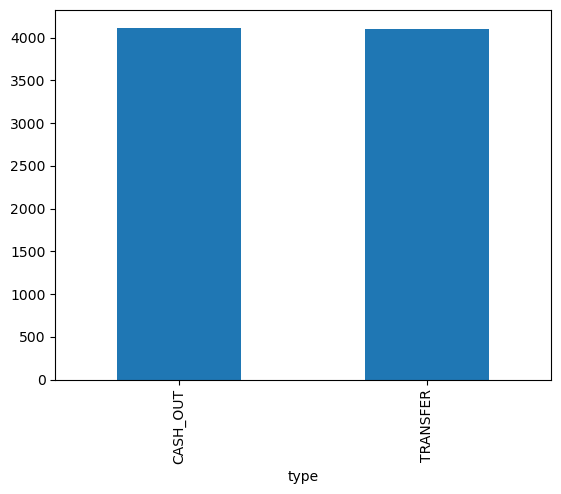

In [15]:
fraud=df["isFraud"].isin([1])
fraud_freq=df[fraud].groupby(["type"]).size().plot(kind="bar")
plt.show()

In [16]:
#only cash out and transfer are fraud.#changing others to all other types
df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [17]:
df["type"]=np.where(df["type"].isin(["PAYMENT" , "CASH_IN" , "DEBIT"] ),"others",df["type"])

In [18]:
df["type"].value_counts()

type
others      3592211
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

In [19]:
df=df[["type","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud","isFlaggedFraud"]]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 388.3+ MB


In [21]:
X=df.drop(columns=["isFraud","isFlaggedFraud"],axis=1)

In [22]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,others,9840,170136,160296,0,0
1,others,1864,21249,19385,0,0
2,TRANSFER,181,181,0,0,0
3,CASH_OUT,181,181,0,21182,0
4,others,11668,41554,29886,0,0
...,...,...,...,...,...,...
6362615,CASH_OUT,339682,339682,0,0,339682
6362616,TRANSFER,6311409,6311409,0,0,0
6362617,CASH_OUT,6311409,6311409,0,68489,6379898
6362618,TRANSFER,850003,850003,0,0,0


In [23]:
dumies_type=pd.get_dummies(X["type"],prefix="type",drop_first=True,dtype=int)

In [24]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,others,9840,170136,160296,0,0
1,others,1864,21249,19385,0,0
2,TRANSFER,181,181,0,0,0
3,CASH_OUT,181,181,0,21182,0
4,others,11668,41554,29886,0,0
...,...,...,...,...,...,...
6362615,CASH_OUT,339682,339682,0,0,339682
6362616,TRANSFER,6311409,6311409,0,0,0
6362617,CASH_OUT,6311409,6311409,0,68489,6379898
6362618,TRANSFER,850003,850003,0,0,0


In [25]:
X=pd.concat([X,dumies_type],axis=1)

In [26]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_TRANSFER,type_others
0,others,9840,170136,160296,0,0,0,1
1,others,1864,21249,19385,0,0,0,1
2,TRANSFER,181,181,0,0,0,1,0
3,CASH_OUT,181,181,0,21182,0,0,0
4,others,11668,41554,29886,0,0,0,1
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682,339682,0,0,339682,0,0
6362616,TRANSFER,6311409,6311409,0,0,0,1,0
6362617,CASH_OUT,6311409,6311409,0,68489,6379898,0,0
6362618,TRANSFER,850003,850003,0,0,0,1,0


In [27]:
X=X.drop(columns=["type"])

In [28]:
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_TRANSFER,type_others
0,9840,170136,160296,0,0,0,1
1,1864,21249,19385,0,0,0,1
2,181,181,0,0,0,1,0
3,181,181,0,21182,0,0,0
4,11668,41554,29886,0,0,0,1
...,...,...,...,...,...,...,...
6362615,339682,339682,0,0,339682,0,0
6362616,6311409,6311409,0,0,0,1,0
6362617,6311409,6311409,0,68489,6379898,0,0
6362618,850003,850003,0,0,0,1,0


In [29]:
X.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_TRANSFER,type_others
amount,1,-0,-0,0,0,0,-0
oldbalanceOrg,-0,1,1,0,0,-0,0
newbalanceOrig,-0,1,1,0,0,-0,0
oldbalanceDest,0,0,0,1,1,0,-0
newbalanceDest,0,0,0,1,1,0,-0
type_TRANSFER,0,-0,-0,0,0,1,-0
type_others,-0,0,0,-0,-0,-0,1


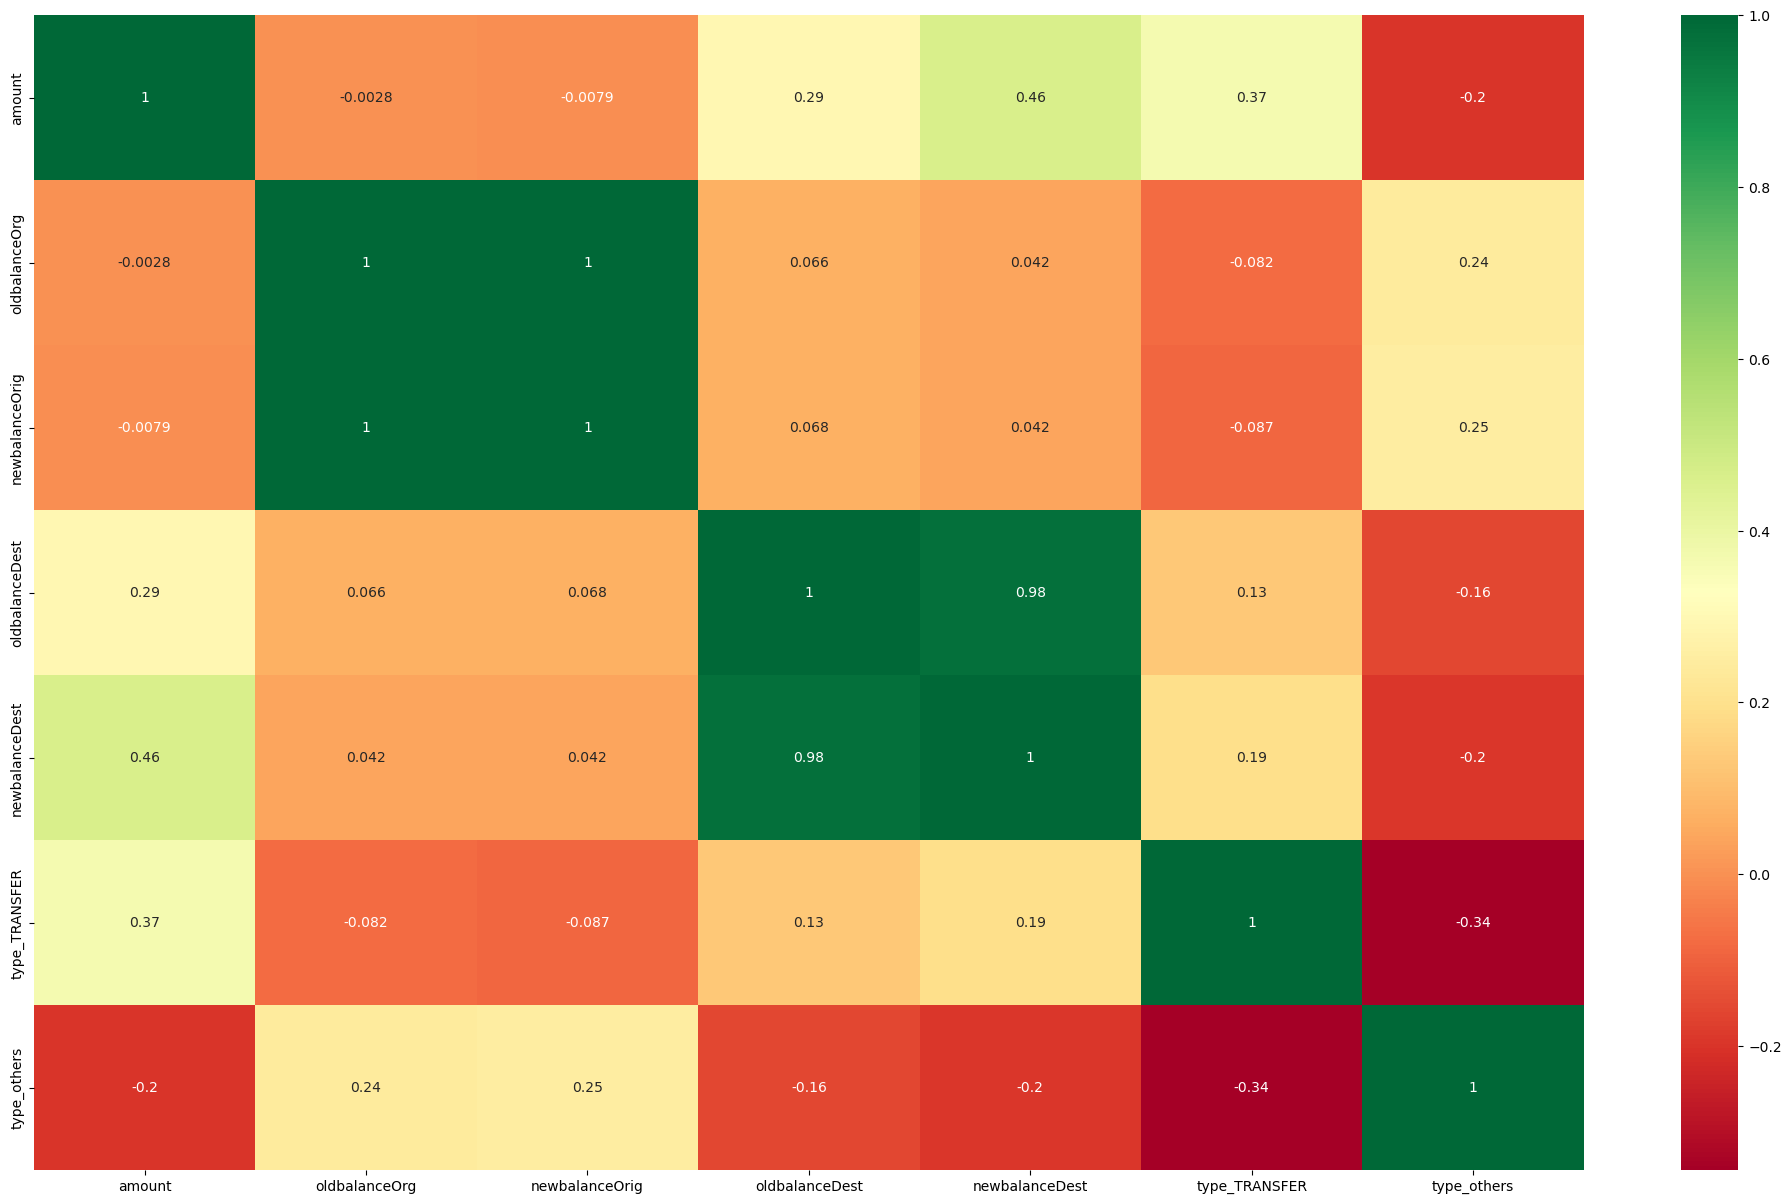

In [30]:
corr=X.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot=True,cmap="RdYlGn")
plt.show()

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["variable"]=X.columns

In [32]:
vif

,VIF,variable
0,4,amount
1,489,oldbalanceOrg
2,494,newbalanceOrig
3,72,oldbalanceDest
4,84,newbalanceDest
5,1,type_TRANSFER
6,1,type_others


In [33]:
X.drop(columns=["newbalanceOrig"],axis=1,inplace=True)

In [34]:
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["variable"]=X.columns

In [35]:
vif

,VIF,variable
0,4,amount
1,1,oldbalanceOrg
2,71,oldbalanceDest
3,83,newbalanceDest
4,1,type_TRANSFER
5,1,type_others


In [36]:
X.drop(["newbalanceDest"],axis=1,inplace=True)

In [37]:
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["variable"]=X.columns

In [38]:
vif

,VIF,variable
0,1,amount
1,1,oldbalanceOrg
2,1,oldbalanceDest
3,1,type_TRANSFER
4,1,type_others


In [39]:
Y=df["isFraud"]

In [40]:
Y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [41]:
X.shape

(6362620, 5)

In [42]:
Y.shape

(6362620,)

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [44]:
X_train.shape

(4453834, 5)

In [45]:
X_test.shape

(1908786, 5)

In [46]:
lr=LogisticRegression()

In [47]:
lr

LogisticRegression()

In [48]:
lr_model=lr.fit(X_train,Y_train)
print(lr.score(X_test,Y_test))

0.998778281064509


In [49]:
y_pred=lr_model.predict(X_test)

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [51]:
cm_lr = confusion_matrix(Y_test,y_pred)

In [52]:
cm_lr

array([[1906347,       4],
       [   2328,     107]], dtype=int64)

In [53]:
y_pred1 = (y_pred > 0.5)
from sklearn.metrics import classification_report
cl_rp_lr = (classification_report(Y_test, y_pred))
print(cl_rp_lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.04      0.08      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.52      0.54   1908786
weighted avg       1.00      1.00      1.00   1908786



In [54]:
tp=cm_lr[0,0]
fp=cm_lr[0,1]
fn=cm_lr[1,0]
tn=cm_lr[1,1]

In [55]:
#classification_report 
accuracy=(tp+tn)/(tp+tn+fp+fn)
print("accuracy",accuracy)
precision=(tp)/(tp+fp)
print("precision",precision)
Recall=(tp)/(tp+fn)
print("Recall",Recall)
f1_score=2*(Recall*precision)/(Recall+precision)
print("f1_score",f1_score)


accuracy 0.998778281064509
precision 0.9999979017505171
Recall 0.9987803057094581
f1_score 0.9993887328683998


In [56]:
#not fraud and also predicted not fraud	1906347
#not fraud but predicted fraud	2328
#fraud and predicted not fraud	4
#fraud and predicted also fraud	107
#those who are actaully fraud and are predicted no fraud are very less. 
#model is peforming good.

In [57]:
#This is a case of imbalanced data set. not fraud person data is too large in comparision to isfraud.

In [58]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [59]:
X

,amount,oldbalanceOrg,oldbalanceDest,type_TRANSFER,type_others
0,9840,170136,0,0,1
1,1864,21249,0,0,1
2,181,181,0,1,0
3,181,181,21182,0,0
4,11668,41554,0,0,1
...,...,...,...,...,...
6362615,339682,339682,0,0,0
6362616,6311409,6311409,0,1,0
6362617,6311409,6311409,68489,0,0
6362618,850003,850003,0,1,0


In [60]:
Y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [61]:
dt_model=DecisionTreeClassifier()

In [62]:
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [63]:
Y_pred_dt=dt_model.predict(X_test)

In [64]:
accuracy_dt=accuracy_score(Y_test,Y_pred_dt)

In [65]:
accuracy_dt

0.9993875688526634

In [66]:
cm_dt= confusion_matrix(Y_test,Y_pred_dt)

In [67]:
print(cm_dt)

[[1905704     647]
 [    522    1913]]


In [73]:
from sklearn.metrics import classification_report
cl_rp_dt = (classification_report(Y_test, Y_pred_dt))

In [74]:
print(cl_rp_dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.75      0.79      0.77      2435

    accuracy                           1.00   1908786
   macro avg       0.87      0.89      0.88   1908786
weighted avg       1.00      1.00      1.00   1908786



In [71]:
#precision recall and f1 score has increased from linear regression.

In [75]:
rf_model =RandomForestClassifier()

In [76]:
rf_model.fit(X_train,Y_train)

RandomForestClassifier()

In [78]:
Y_pred_rf=rf_model.predict(X_test)

In [79]:
accuracy_rf=accuracy_score(Y_test,Y_pred_rf)

In [80]:
accuracy_rf

0.9995751226172027

In [81]:
cm_rf= confusion_matrix(Y_test,Y_pred_rf)

In [82]:
cm_rf

array([[1906193,     158],
       [    653,    1782]], dtype=int64)

In [83]:
#this is comparitively good model for our business problem statement as people who were actually fraud and predicted not fraud are reduced.it reduced potential financial loss .

In [117]:
from sklearn.metrics import classification_report
cl_rp_rf = (classification_report(Y_test, Y_pred_rf))

In [85]:
print(cl_rp_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.92      0.73      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.96      0.87      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



In [86]:
#precision f1 score has increased significantly.

In [87]:
ab_model=AdaBoostClassifier()

In [88]:
ab_model.fit(X_train,Y_train)

AdaBoostClassifier()

In [89]:
Y_pred_ab=ab_model.predict(X_test)
accuracy_ab=accuracy_score(Y_test,Y_pred_ab)

In [90]:
accuracy_ab

0.998902967645404

In [115]:
cm_ab= confusion_matrix(Y_test,Y_pred_ab)

In [116]:
cm_rf

array([[1906144,     207],
       [   1887,     548]], dtype=int64)

In [91]:
cl_rp_ab = (classification_report(Y_test, Y_pred_ab))

In [92]:
print(cl_rp_ab )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.73      0.23      0.34      2435

    accuracy                           1.00   1908786
   macro avg       0.86      0.61      0.67   1908786
weighted avg       1.00      1.00      1.00   1908786



In [94]:
#recall and f1 score has reduced. so not good.

In [98]:
# now using bagging classifier

In [99]:
from sklearn.ensemble import BaggingClassifier

In [100]:
bc_model=BaggingClassifier()

In [101]:
bc_model.fit(X_train,Y_train)

BaggingClassifier()

In [140]:
cm_bc= confusion_matrix(Y_test,Y_pred_bc)

In [141]:
cm_bc

array([[1906168,     183],
       [    601,    1834]], dtype=int64)

In [102]:
Y_pred_bc= bc_model.predict(X_test)
accuracy_bc = accuracy_score(Y_test,Y_pred_bc)
print(accuracy_bc)

0.9995892677335227


In [103]:
cl_rp_bc=classification_report(Y_test,Y_pred_bc)
print(cl_rp_bc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.91      0.75      0.82      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.88      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



In [107]:
#f1 score is slightly better then random forest

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
gb_model  = GradientBoostingClassifier()

In [110]:
gb_model.fit(X_train,Y_train)

GradientBoostingClassifier()

In [111]:
Y_pred_gb=gb_model.predict(X_test)
accuracy_gb=accuracy_score(Y_test,Y_pred_gb)
print(accuracy_gb)

0.9987264156380024


In [112]:
cl_rp_gb = classification_report(Y_test , Y_pred_gb)
print(cl_rp_gb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.83      0.00      0.00      2435

    accuracy                           1.00   1908786
   macro avg       0.92      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786



In [118]:
cm_gb= confusion_matrix(Y_test,Y_pred_gb)

In [119]:
print(cm_gb)

[[1906350       1]
 [   2430       5]]


In [120]:
# recall and precision is almost 0 so performance is very bad.

In [126]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:30
   ---------------------------------------- 0.5/99.8 MB 4.2 MB/s eta 0:00:24
   ---------------------------------------- 1.0/99.8 MB 6.9 MB/s eta 0:00:15
    --------------------------------------- 1.6/99.8 MB 8.3 MB/s eta 0:00:12
    --------------------------------------- 1.9/99.8 MB 8.1 MB/s eta 0:00:13
    --------------------------------------- 2.4/99.8 MB 8.5 MB/s eta 0:00:12
   - -------------------------------------- 2.9/99.8 MB 8.7 MB/s eta 0:00:12
   - ---------------------------------

In [127]:
import xgboost
from xgboost import XGBClassifier

In [128]:
xgb_model = xgboost.XGBClassifier()

In [129]:
xgb_model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [130]:
Y_pred_xgb = xgb_model.predict(X_test)

In [131]:
accuracy_xgb = accuracy_score(Y_test,Y_pred_xgb)

In [132]:
print(accuracy_xgb)

0.999537402307016


In [134]:
cm_xgb= confusion_matrix(Y_test,Y_pred_xgb)

In [136]:
print(cm_xgb)

[[1906141     210]
 [    673    1762]]


In [143]:
cl_rp_xgb = classification_report(Y_test , Y_pred_xgb)
print(cl_rp_xgb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.89      0.72      0.80      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.86      0.90   1908786
weighted avg       1.00      1.00      1.00   1908786



In [144]:
# i think random forest has the best out of all because for fraud person it has minium number which are being stated as not fraud. with this model we can have minimum potential loss to the bank or cpmpany. although some customer loss will be there due to actual not fraud but predicted fraud. 